In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from networkx.algorithms import community

In [2]:
# Read the bipartite graph B
pickleFile = '1%_Sample_author_genre_bipartite.gpickle'
with open(pickleFile,'rb') as f:
    B = pickle.load(f)

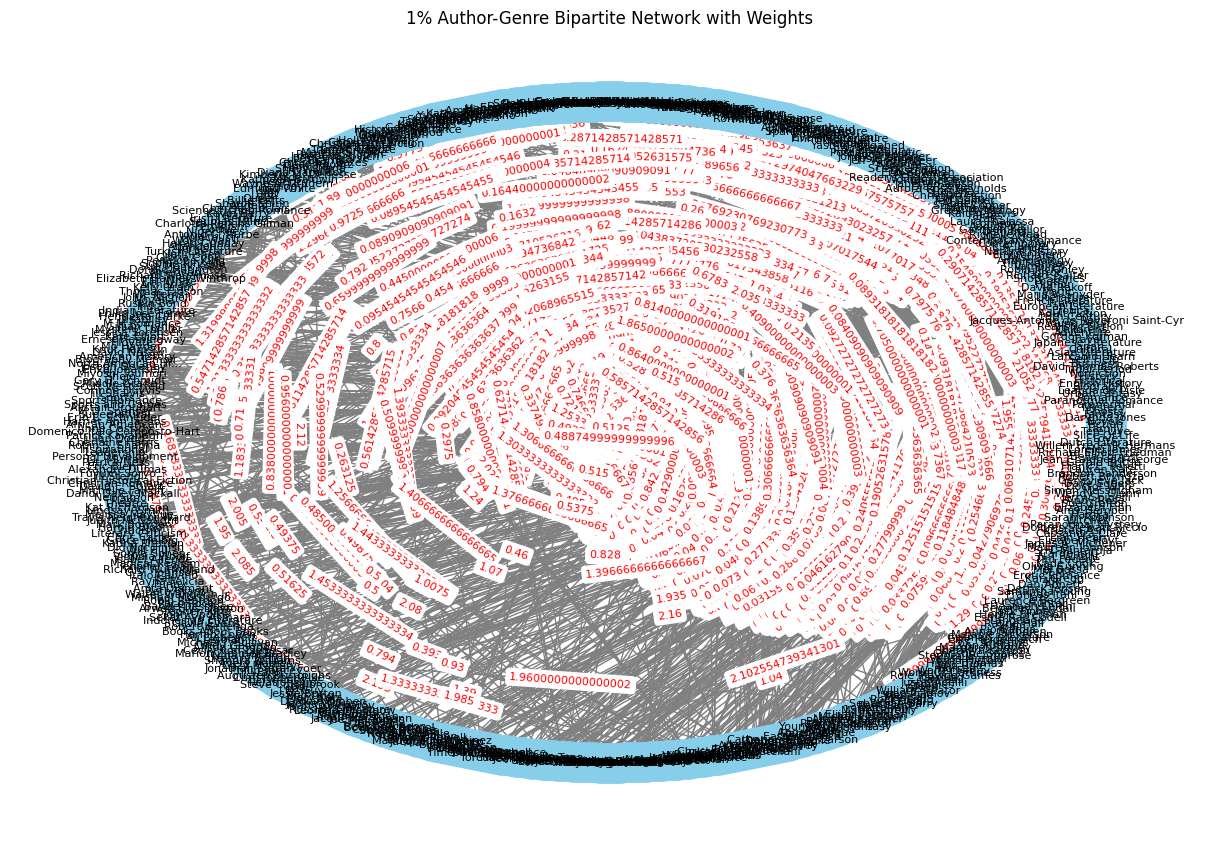

In [3]:
# Visualize the bipartite graph
pos = nx.circular_layout(B)

plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', node_size=800)

# Display weights on edges (optional)
edge_labels = {(i, j): B[i][j]['weight'] for i, j in B.edges}
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("1% Author-Genre Bipartite Network with Weights")
plt.show()  


In [4]:
for edge in B.edges:
    print(edge, B.get_edge_data(edge[1],edge[0]))

genres = set()
authors = set()
for node in B.nodes.data('bipartite'):
    if node[1]==1:
        genres.add(node[0])
    else:
        authors.add(node[0])
print(sorted(genres))
print(len(genres))
print(authors)
print(len(authors))

# print(B.get_edge_data('Tere Liye','Mystery')==None)

# print(B.get_edge_data('Family','Tere Liye')['weight'])


('Tere Liye', 'Family') {'weight': 2.1213891804217155}
('Tere Liye', 'Fiction') {'weight': 0.04848889555249636}
('Tere Liye', 'Novels') {'weight': 0.6061111944062044}
('Tere Liye', 'Adult') {'weight': 0.21400000000000002}
('Tere Liye', 'Asian Literature') {'weight': 0.3057142857142857}
('Tere Liye', 'Drama') {'weight': 0.535}
('Tere Liye', 'Indonesian Literature') {'weight': 0.7133333333333334}
('Tere Liye', 'Literature') {'weight': 0.14266666666666666}
('Tere Liye', 'Love') {'weight': 2.14}
('Tere Liye', 'Realistic Fiction') {'weight': 0.16461538461538464}
('Tere Liye', 'Romance') {'weight': 0.018448275862068965}
('Tere Liye', 'Slice Of Life') {'weight': 2.14}
('Family', 'Hannah Richell') {'weight': 0.94}
('Family', 'Gloria Cook') {'weight': 1.1475}
('Fiction', 'Gordon Korman') {'weight': 0.021942857142857142}
('Fiction', 'Maria V. Snyder') {'weight': 0.025485714285714285}
('Fiction', 'David Rakoff') {'weight': 0.0224}
('Fiction', 'Robin McKinley') {'weight': 0.022000000000000002}
('F

346
Author: Deborah Cooke, Degree Centrality: 0.4985507246376812, Associated Authors: 172
Author: Dolores Stewart Riccio, Degree Centrality: 0.6666666666666666, Associated Authors: 230
Author: Amy Hempel, Degree Centrality: 0.5710144927536231, Associated Authors: 197
Author: Melissa Mayhue, Degree Centrality: 0.6086956521739131, Associated Authors: 210
Author: Antonio G. Iturbe, Degree Centrality: 0.6434782608695653, Associated Authors: 222
Author: Abbey Sy, Degree Centrality: 0.15942028985507248, Associated Authors: 55
Author: Tim Federle, Degree Centrality: 0.3159420289855073, Associated Authors: 109
Author: Toni Morrison, Degree Centrality: 0.5623188405797102, Associated Authors: 194
Author: Avery Aames, Degree Centrality: 0.11594202898550725, Associated Authors: 40
Author: Victoria Aveyard, Degree Centrality: 0.7971014492753623, Associated Authors: 275
Author: Sophie Kinsella, Degree Centrality: 0.7565217391304347, Associated Authors: 261
Author: Erin L. Schneider, Degree Centralit

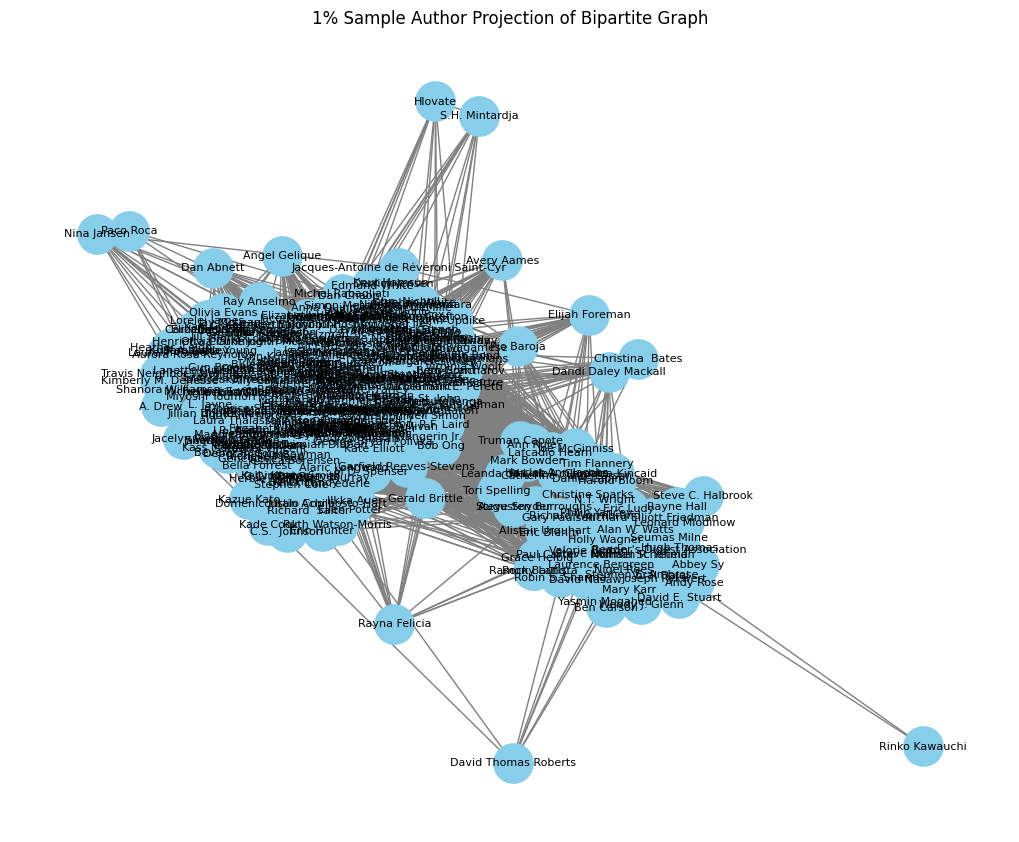

In [5]:
# Project the bipartite graph onto the set of authors
sample_author_projection= nx.bipartite.weighted_projected_graph(B, nodes=authors, ratio=False)

# Calculate degree centrality for authors
author_degree_centrality = nx.degree_centrality(sample_author_projection)

# Identify genres associated with authors
author_genre_associations = {author: list(sample_author_projection.neighbors(author)) for author in author_degree_centrality}

# Print degree centrality for authors and genres associated with each author
print(len(author_degree_centrality.items()))
for author, centrality in author_degree_centrality.items():
    print(f"Author: {author}, Degree Centrality: {centrality}, Associated Authors: {len(author_genre_associations[author])}")

# Optionally, visualize the projected graph
plt.figure(figsize=(10, 8))
nx.draw(sample_author_projection, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', node_size=800)
plt.title("1% Sample Author Projection of Bipartite Graph")
plt.show()


In [6]:
# Apply Louvain community detection algorithm
sample_louvain_author_communities = community.louvain_communities(sample_author_projection)
print(sample_louvain_author_communities)

[{'Lian Hearn', 'Jack Finney', 'Sarah Bryant', 'Marion Zimmer Bradley', 'Mo Hayder', 'Jennifer Egan', 'Alaric Longward', 'Jessi Gage', 'John Jakes', 'Gloria Cook', 'Thomas Eidson', 'Ivy  Rose', 'D.L. Bogdan', 'Guy Gavriel Kay', 'Antonio G. Iturbe', 'Lisa Kleypas', 'Beth Gutcheon', 'Sebastian Barry', 'Toni Morrison', 'Michael Morpurgo', 'Manuel Mujica Láinez', 'Anita Diamant', 'Patrick Süskind', 'Jessie Burton', 'R.S. Belcher', 'J.M. Coetzee', 'Sue Monk Kidd', 'Jill Stengl', 'Lynn Kurland', 'Gary D. Schmidt', 'Christopher Castellani', 'Damian Dibben', 'Marie Corelli', 'Max Allan Collins', 'Patricia St. John', 'Robert Hellenga', 'Isabel Allende', 'Elizabeth Hoyt', 'T.H. White', 'Kathleen Baldwin', 'James A. Michener', 'Diana Gabaldon', 'Janette Oke', 'Melanie Dickerson', 'Alexandre Dumas', 'Jonathan Safran Foer', 'Beverley Kendall'}, {'Andy Rose', 'Ben Carson', 'Augusten Burroughs', 'Alan W. Watts', 'Catherine Claire Larson', 'Viral Dalal', 'Tori Spelling', 'Ann Rule', 'Harriet Ann Jacob

In [7]:
# Load the dataset
dataset_path = "Processed_BookData.csv"
df = pd.read_csv(dataset_path)

# sample for testing
random.seed(74)  # for reproducibility
selected_rows = random.sample(range(len(df)), int(0.01 * len(df)))
df_sample = df.iloc[selected_rows]


In [8]:
for i in range(len(sample_louvain_author_communities)):
    print("Community", i+1, "-")
    comm_genres = set()
    # print(type(sample_louvain_author_communities[i]))
    for auth in sample_louvain_author_communities[i]:
        print(auth,end=", ")
        genres = set()
        for gList in df[df['book_authors']==auth]['genres']:
            for g in gList.split(","):
                genres.add(g)   
        # print(len(genres))
        if (len(comm_genres)==0):
            comm_genres = genres
        else:
            comm_genres = comm_genres.intersection(genres)
        # print(genres)
        # print(comm_genres)
    # print(comm_genres)
    # print(len(comm_genres))        
    print()
    print()

Community 1 -
Lian Hearn, Jack Finney, Sarah Bryant, Marion Zimmer Bradley, Mo Hayder, Jennifer Egan, Alaric Longward, Jessi Gage, John Jakes, Gloria Cook, Thomas Eidson, Ivy  Rose, D.L. Bogdan, Guy Gavriel Kay, Antonio G. Iturbe, Lisa Kleypas, Beth Gutcheon, Sebastian Barry, Toni Morrison, Michael Morpurgo, Manuel Mujica Láinez, Anita Diamant, Patrick Süskind, Jessie Burton, R.S. Belcher, J.M. Coetzee, Sue Monk Kidd, Jill Stengl, Lynn Kurland, Gary D. Schmidt, Christopher Castellani, Damian Dibben, Marie Corelli, Max Allan Collins, Patricia St. John, Robert Hellenga, Isabel Allende, Elizabeth Hoyt, T.H. White, Kathleen Baldwin, James A. Michener, Diana Gabaldon, Janette Oke, Melanie Dickerson, Alexandre Dumas, Jonathan Safran Foer, Beverley Kendall, 

Community 2 -
Andy Rose, Ben Carson, Augusten Burroughs, Alan W. Watts, Catherine Claire Larson, Viral Dalal, Tori Spelling, Ann Rule, Harriet Ann Jacobs, Grace Helbig, Joseph Rykwert, Nigel Rees, Harold Bloom, Paul Carter, Rocky Lang, L

In [24]:
def getGenrelist(table,author):
    genreSeries = table[table['book_authors'] == author]['genres']
    genres = set()
    for index,values in genreSeries.items():
        for value in values.split(','):
            genres.add(value)
    return genres

In [34]:
# df_sample[df_sample['book_authors']=='Rainbow Rowell']

In [27]:
edges = sample_author_projection.edges
print(edges)
edge_weights = {}
for author1,author2 in edges:
    # print(author1,author2)
    genres1 = getGenrelist(df_sample,author1)
    genres2 = getGenrelist(df_sample,author2)
    common_genres = genres1.intersection(genres2)
    weightsSum = 0
    for genre in common_genres:
        weightsSum += B.get_edge_data(author1,genre)['weight'] * B.get_edge_data(author2,genre)['weight']
    mean_weight = weightsSum/len(common_genres)
    edge_weights[(author1,author2)] = mean_weight
    # print(common_genres)

[('Deborah Cooke', 'Jeff VanderMeer'), ('Deborah Cooke', 'William Sleator'), ('Deborah Cooke', 'Charlaine Harris'), ('Deborah Cooke', 'Dia Reeves'), ('Deborah Cooke', 'Katherine Addison'), ('Deborah Cooke', 'Dolores Stewart Riccio'), ('Deborah Cooke', 'Henrietta Clarke'), ('Deborah Cooke', 'Melissa Mayhue'), ('Deborah Cooke', 'Gloria Cook'), ('Deborah Cooke', 'J.M. Guy'), ('Deborah Cooke', 'Herbie Brennan'), ('Deborah Cooke', 'Laura Thalassa'), ('Deborah Cooke', 'Michael J. Sullivan'), ('Deborah Cooke', 'thefreakoffreaks'), ('Deborah Cooke', 'Richard  Salter'), ('Deborah Cooke', 'Victoria Aveyard'), ('Deborah Cooke', 'Ally Carter'), ('Deborah Cooke', 'Lesley Pearse'), ('Deborah Cooke', 'Sophie Kinsella'), ('Deborah Cooke', 'Erin L. Schneider'), ('Deborah Cooke', 'R.S. Belcher'), ('Deborah Cooke', 'Kiera Cass'), ('Deborah Cooke', 'Derek Landy'), ('Deborah Cooke', 'Alyxandra Harvey'), ('Deborah Cooke', 'Jill Shalvis'), ('Deborah Cooke', 'Jillian Dodd'), ('Deborah Cooke', 'Jay McLean'), (

In [28]:
sample_louvain_author_communities

[{'Alaric Longward',
  'Alexandre Dumas',
  'Anita Diamant',
  'Antonio G. Iturbe',
  'Beth Gutcheon',
  'Beverley Kendall',
  'Christopher Castellani',
  'D.L. Bogdan',
  'Damian Dibben',
  'Diana Gabaldon',
  'Elizabeth Hoyt',
  'Gary D. Schmidt',
  'Gloria Cook',
  'Guy Gavriel Kay',
  'Isabel Allende',
  'Ivy  Rose',
  'J.M. Coetzee',
  'Jack Finney',
  'James A. Michener',
  'Janette Oke',
  'Jennifer Egan',
  'Jessi Gage',
  'Jessie Burton',
  'Jill Stengl',
  'John Jakes',
  'Jonathan Safran Foer',
  'Kathleen Baldwin',
  'Lian Hearn',
  'Lisa Kleypas',
  'Lynn Kurland',
  'Manuel Mujica Láinez',
  'Marie Corelli',
  'Marion Zimmer Bradley',
  'Max Allan Collins',
  'Melanie Dickerson',
  'Michael Morpurgo',
  'Mo Hayder',
  'Patricia St. John',
  'Patrick Süskind',
  'R.S. Belcher',
  'Robert Hellenga',
  'Sarah Bryant',
  'Sebastian Barry',
  'Sue Monk Kidd',
  'T.H. White',
  'Thomas Eidson',
  'Toni Morrison'},
 {'Abbey Sy',
  'Alan W. Watts',
  'Alistair Urquhart',
  'Andy 

In [29]:
edge_weights

{('Deborah Cooke', 'Jeff VanderMeer'): 0.0013312833748665004,
 ('Deborah Cooke', 'William Sleator'): 0.0037699916553933788,
 ('Deborah Cooke', 'Charlaine Harris'): 0.03950969603304369,
 ('Deborah Cooke', 'Dia Reeves'): 0.0037187689426842296,
 ('Deborah Cooke', 'Katherine Addison'): 0.001506550373798505,
 ('Deborah Cooke', 'Dolores Stewart Riccio'): 0.003964637963688147,
 ('Deborah Cooke', 'Henrietta Clarke'): 0.0012019470868014268,
 ('Deborah Cooke', 'Melissa Mayhue'): 0.01938307293953193,
 ('Deborah Cooke', 'Gloria Cook'): 0.0014292583234244947,
 ('Deborah Cooke', 'J.M. Guy'): 0.0015811320754716982,
 ('Deborah Cooke', 'Herbie Brennan'): 0.004005616133855465,
 ('Deborah Cooke', 'Laura Thalassa'): 0.017617199024917124,
 ('Deborah Cooke', 'Michael J. Sullivan'): 0.0016258810964756142,
 ('Deborah Cooke', 'thefreakoffreaks'): 0.0012361994649227111,
 ('Deborah Cooke', 'Richard  Salter'): 0.004241240612317551,
 ('Deborah Cooke', 'Victoria Aveyard'): 0.0027614801347413337,
 ('Deborah Cooke', 

In [ ]:
data = list(edge_weights.items())
# Create a dataframe


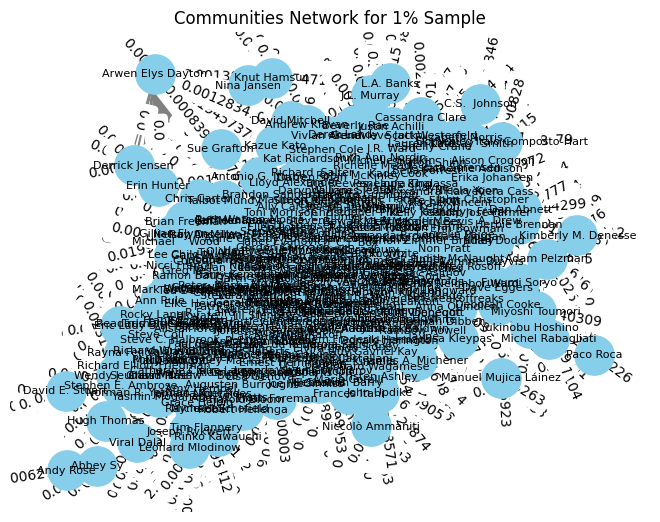

In [31]:
# Create the communities Network
C = nx.Graph()
C.add_nodes_from([node for community in sample_louvain_author_communities for node in community])
C.add_edges_from([(a, b, {'weight': edge_weights.get((a, b), 0.0)}) for a in C.nodes for b in C.nodes if a != b])

# Visualize communities Network
pos = nx.spring_layout(C)
nx.draw(C, pos, with_labels=True, font_size=8, node_color='skyblue', edge_color='gray', node_size=800, font_color='black')

# Display edge weights
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)

plt.title("Communities Network for 1% Sample")
plt.show()

In [33]:
C.edges

EdgeView([('Lian Hearn', 'Jack Finney'), ('Lian Hearn', 'Sarah Bryant'), ('Lian Hearn', 'Marion Zimmer Bradley'), ('Lian Hearn', 'Mo Hayder'), ('Lian Hearn', 'Jennifer Egan'), ('Lian Hearn', 'Alaric Longward'), ('Lian Hearn', 'Jessi Gage'), ('Lian Hearn', 'John Jakes'), ('Lian Hearn', 'Gloria Cook'), ('Lian Hearn', 'Thomas Eidson'), ('Lian Hearn', 'Ivy  Rose'), ('Lian Hearn', 'D.L. Bogdan'), ('Lian Hearn', 'Guy Gavriel Kay'), ('Lian Hearn', 'Antonio G. Iturbe'), ('Lian Hearn', 'Lisa Kleypas'), ('Lian Hearn', 'Beth Gutcheon'), ('Lian Hearn', 'Sebastian Barry'), ('Lian Hearn', 'Toni Morrison'), ('Lian Hearn', 'Michael Morpurgo'), ('Lian Hearn', 'Manuel Mujica Láinez'), ('Lian Hearn', 'Anita Diamant'), ('Lian Hearn', 'Patrick Süskind'), ('Lian Hearn', 'Jessie Burton'), ('Lian Hearn', 'R.S. Belcher'), ('Lian Hearn', 'J.M. Coetzee'), ('Lian Hearn', 'Sue Monk Kidd'), ('Lian Hearn', 'Jill Stengl'), ('Lian Hearn', 'Lynn Kurland'), ('Lian Hearn', 'Gary D. Schmidt'), ('Lian Hearn', 'Christopher 